In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

**Region Codes Legend**

In [52]:
region_codes = pd.read_csv('Data/region_codes.csv')
region_codes.head()

,region_code,region_name,Composition,Description
0,DR01,Vancouver Island/Coast,"RD 17, 19, 21, 23, 25, 43, 45",NaN
1,DR02,Mainland/Southwest,"RD 09, 15, 29, 31",NaN
2,DR03,Thompson/Okanagan,"RD 07, 33, 35, 37, 39",NaN
3,DR04,Kootenay,"RD 01, 03, 05",NaN
4,DR05,Cariboo,"RD 41, 53",NaN


In [166]:
region_codes['region_code'].nunique()

74

**Employment By Industry Legend**

In [53]:
industry_legend = pd.read_csv('Data/vancouver_employment_by_industry_legend.csv')
industry_legend.head()

,industry_name,code
0,All Industries,0
1,Goods-Producing Sector,"11,21,22,23,31,32,33"
2,Agriculture,"1100 - 1129, 1151 - 1152"
3,Crop Production,1111 - 1119
4,Animal Production,1121 - 1129


**Business Size**

In [56]:
business_size = pd.read_csv('Data/vancouver_business_size.csv')
business_size = business_size.fillna(0)
business_size.head()

,year,region_code,business_type,unknown,one_to_4,five_to_9,ten_to_19,twenty_to_49,fifty_to_199,two_hundred_plus
0,1999,DR01,"Agric., Forestry, Fishing & Hunt","1,227",954,219,142,99,44.0,7.0
1,1999,DR01,Mining & Oil & Gas Extract.,59,40,7,3,0,4.0,1.0
2,1999,DR01,Utilities,13,7,4,4,2,3.0,1.0
3,1999,DR01,Construction,"3,820","2,046",468,307,154,34.0,1.0
4,1999,DR01,Manufacturing,768,701,181,150,114,54.0,14.0


**Employment By Industry**

In [122]:
employment_industry = pd.read_csv('Data/vancouver_employment_by_industry.csv')
employment_industry['year'] = employment_industry['year'].astype(int)
employment_industry.head(10)

,year,industry_code,value
0,1987,0,1377700.0
1,1987,"11,21,22,23,31,32,33",333800.0
2,1987,"1100 1129, 1151 1152",31700.0
3,1987,1111 1119,15500.0
4,1987,1121 1129,14100.0
5,1987,1100,1600.0
6,1987,1151 1152,NaN
7,1987,"1131 1142, 1153, 2100 2131",49500.0
8,1987,"1131 1133, 1153",24000.0
9,1987,1141 1142,6100.0


**Room Revenues**

In [147]:
# 2000 - 2010
room_revenues_2010 = pd.read_csv('Data/vancouver_room_revenues_2000_2010.csv')
room_revenues_2010['properties'] = room_revenues_2010['properties'].fillna(0)
room_revenues_2010['year'] = room_revenues_2010['year'].astype(int)
room_revenues_2010['rooms'] = room_revenues_2010['rooms'].fillna(0)
room_revenues_2010['rooms'] = room_revenues_2010['rooms'].apply(lambda x : int(str(x).replace(',', '')))
room_revenues_2010.head()

,year,month,region_code,acc_type,revenue,properties,rooms
0,2000,1,DR01,TOT,7582000.0,345,14092
1,2000,2,DR01,TOT,10090000.0,374,14335
2,2000,3,DR01,TOT,13198000.0,401,14819
3,2000,4,DR01,TOT,15808000.0,423,15104
4,2000,5,DR01,TOT,21442000.0,468,15606


In [148]:
room_revenues_2010.describe()

,year,month,revenue,rooms
count,58212.000000,58212.000000,2.227900e+04,58212.000000
mean,2004.761905,6.357143,6.216831e+06,1631.562066
std,3.037957,3.449125,1.750290e+07,5773.003382
min,2000.000000,1.000000,8.000000e+03,0.000000
25%,2002.000000,3.000000,5.100000e+05,0.000000
50%,2005.000000,6.000000,1.287000e+06,324.000000
75%,2007.000000,9.000000,3.451500e+06,1068.000000
max,2010.000000,12.000000,2.637480e+08,92962.000000


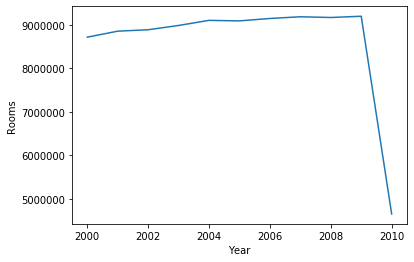

In [149]:
room_revenues_2010_agg_year = room_revenues_2010.groupby(['year']).agg(sum)
plt.plot(room_revenues_2010_agg_year['rooms'])
plt.xlabel('Year'); plt.ylabel('Rooms');
plt.show()

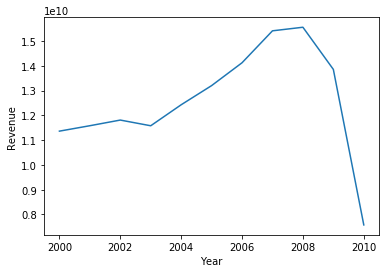

In [150]:
room_revenues_2010_agg_year = room_revenues_2010.groupby(['year']).agg(sum)
plt.plot(room_revenues_2010_agg_year['revenue'])
plt.xlabel('Year'); plt.ylabel('Revenue');
plt.show()

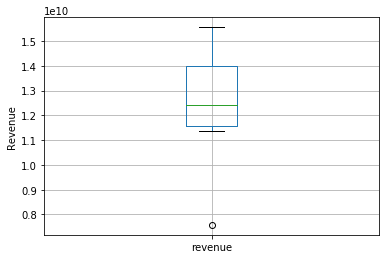

In [151]:
room_revenues_2010_agg_year.boxplot(column='revenue')
plt.ylabel('Revenue');

In [152]:
# 2010 - 2019
room_revenues_2019 = pd.read_csv('Data/vancouver_room_revenues_2010_2019.csv')
room_revenues_2019['year'] = room_revenues_2019['year'].astype(int)
room_revenues_2019['month'] = room_revenues_2019['month'].astype(int)
room_revenues_2019['revenue'] = room_revenues_2019['revenue'].fillna(0)
room_revenues_2019.head()

,year,month,region_code,region_name,revenue
0,2010,1,UC39,Campbell River,0.0
1,2010,2,UC39,Campbell River,0.0
2,2010,3,UC39,Campbell River,0.0
3,2010,4,UC39,Campbell River,0.0
4,2010,5,UC39,Campbell River,0.0


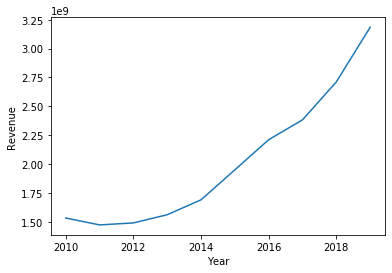

In [110]:
room_revenues_2019_agg_year = room_revenues_2019.groupby(['year']).agg(sum)
plt.plot(room_revenues_2019_agg_year['revenue'])
plt.xlabel('Year'); plt.ylabel('Revenue');
plt.show()

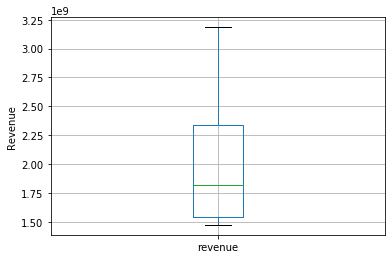

In [153]:
room_revenues_2019_agg_year.boxplot(column='revenue')
plt.ylabel('Revenue');

**Small Business**

In [172]:
small_business = pd.read_csv('Data/vancouver_small_business_by_region.csv')
small_business['value'] = small_business['value'].fillna(0)
small_business['value'] = small_business['value'].apply(lambda x : int(str(x).replace(',', '')))
small_business.head()

,year,region_code,value
0,2007,DR01,79200
1,2008,DR01,80300
2,2009,DR01,82400
3,2010,DR01,83400
4,2011,DR01,77500


In [173]:
small_business['value'].describe()

count        84.000000
mean      66526.190476
std       93202.851861
min        6200.000000
25%        9200.000000
50%       16000.000000
75%       78400.000000
max      330100.000000
Name: value, dtype: float64

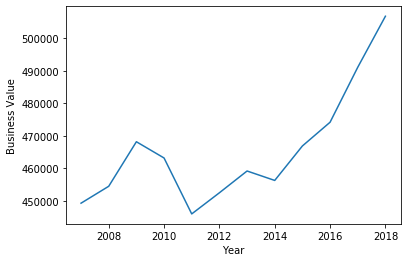

In [175]:
small_business_agg_year = small_business.groupby(['year']).agg(sum)
plt.plot(small_business_agg_year['value'])
plt.xlabel('Year'); plt.ylabel('Business Value');
plt.show()

**Toursim Indicators**

In [160]:
tourism = pd.read_csv('Data/vancouver_turism_indicators.csv')
tourism.head()

,year,revenue,GDP,real_GDP,implicit_price_index,employment,wages_and_salaries,consumption_taxes,employment_vcm,employment_vi,employment_to,employment_nbc,employment_bcr,employment_ccc
0,2000,"9,350","4,679","5,085",91.4,96.7,"2,801",855,"60,600","15,300","9,500","5,400","3,900","2,000"
1,2001,"9,448","4,857","5,102",94.6,104.2,"2,968",861,"67,300","15,700","9,300","5,400","4,500","2,100"
2,2002,"9,754","4,931","5,147",95.2,104.2,"2,927",943,"64,800","17,700","10,400","5,300","4,200","1,800"
3,2003,"9,721","4,703","4,911",95.2,105.8,"2,945",989,"67,200","16,400","11,300","5,100","4,000","1,800"
4,2004,"10,595","5,134","5,195",98.4,107.6,"3,128","1,047","67,100","19,100","11,000","5,200","3,200","2,000"


In [161]:
tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  16 non-null     int64  
 1   revenue               16 non-null     object 
 2   GDP                   16 non-null     object 
 3   real_GDP              16 non-null     object 
 4   implicit_price_index  16 non-null     float64
 5   employment            16 non-null     float64
 6   wages_and_salaries    16 non-null     object 
 7   consumption_taxes     16 non-null     object 
 8   employment_vcm        16 non-null     object 
 9   employment_vi         16 non-null     object 
 10  employment_to         16 non-null     object 
 11  employment_nbc        16 non-null     object 
 12  employment_bcr        16 non-null     object 
 13  employment_ccc        16 non-null     object 
dtypes: float64(2), int64(1), object(11)
memory usage: 1.9+ KB


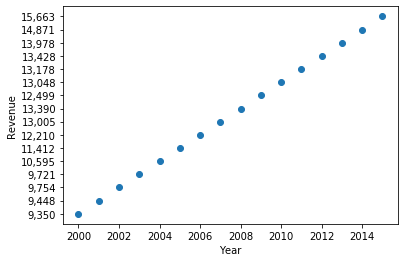

In [183]:
plt.scatter(tourism['year'], tourism['revenue'])
plt.xlabel('Year'); plt.ylabel('Revenue');
plt.show()

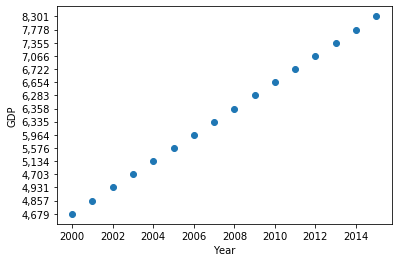

In [184]:
plt.scatter(tourism['year'], tourism['GDP'])
plt.xlabel('Year'); plt.ylabel('GDP');
plt.show()

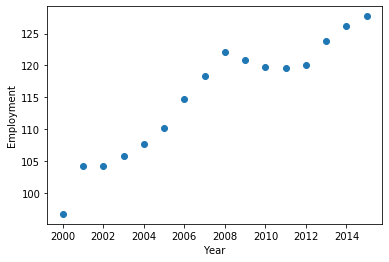

In [185]:
plt.scatter(tourism['year'], tourism['employment'])
plt.xlabel('Year'); plt.ylabel('Employment');
plt.show()

**Visits**

In [167]:
visits = pd.read_csv('Data/vancouver_visits.csv')
visits['value'] = visits['value'].fillna(0)
visits.head()

,year,month,value
0,1994,1,320101
1,1994,2,315660
2,1994,3,429018
3,1994,4,443933
4,1994,5,550832


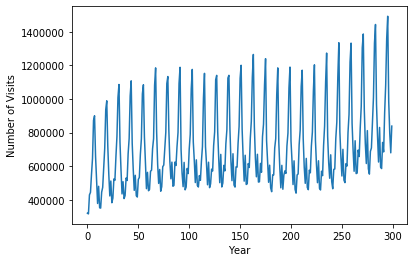

In [171]:
plt.plot(visits['value'])
plt.xlabel('Year'); plt.ylabel('Number of Visits');
plt.show()

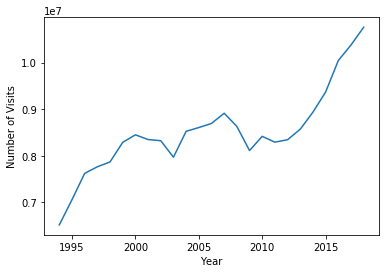

In [179]:
visits_agg_year = visits.groupby(['year']).agg(sum)
plt.plot(visits_agg_year['value'])
plt.xlabel('Year'); plt.ylabel('Number of Visits');
plt.show()